In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [31]:
df = pd.read_excel('Dulieu_1.xlsx', header=1)
df.head()

,Unnamed: 0,A,B,C,D,CLASS
0,NaN,7.0,3.2,4.7,1.4,Iris-versicolor
1,NaN,6.4,3.2,4.5,1.5,Iris-versicolor
2,NaN,6.9,3.1,4.9,1.5,Iris-versicolor
3,NaN,5.5,2.3,4.0,1.3,Iris-versicolor
4,NaN,6.5,2.8,4.6,1.5,Iris-versicolor


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   A           20 non-null     float64
 2   B           20 non-null     float64
 3   C           20 non-null     float64
 4   D           20 non-null     float64
 5   CLASS       20 non-null     object 
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


In [33]:
df = df.loc[:, ~df.columns.str.contains('Unnamed: 0')]

In [34]:
df

,A,B,C,D,CLASS
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor
5,5.7,2.8,4.5,1.3,Iris-versicolor
6,6.3,3.3,4.7,1.6,Iris-versicolor
7,4.9,2.4,3.3,1.0,Iris-versicolor
8,6.6,2.9,4.6,1.3,Iris-versicolor
9,5.2,2.7,3.9,1.4,Iris-versicolor


In [35]:
# Khởi tạo MinMaxScaler
X = df[['A', 'B', 'C', 'D']]
y = df['CLASS']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [36]:
X

array([[0.77777778, 0.69230769, 0.42424242, 0.26666667],
       [0.55555556, 0.69230769, 0.36363636, 0.33333333],
       [0.74074074, 0.61538462, 0.48484848, 0.33333333],
       [0.22222222, 0.        , 0.21212121, 0.2       ],
       [0.59259259, 0.38461538, 0.39393939, 0.33333333],
       [0.2962963 , 0.38461538, 0.36363636, 0.2       ],
       [0.51851852, 0.76923077, 0.42424242, 0.4       ],
       [0.        , 0.07692308, 0.        , 0.        ],
       [0.62962963, 0.46153846, 0.39393939, 0.2       ],
       [0.11111111, 0.30769231, 0.18181818, 0.26666667],
       [0.51851852, 0.76923077, 0.81818182, 1.        ],
       [0.33333333, 0.30769231, 0.54545455, 0.6       ],
       [0.81481481, 0.53846154, 0.78787879, 0.73333333],
       [0.51851852, 0.46153846, 0.6969697 , 0.53333333],
       [0.59259259, 0.53846154, 0.75757576, 0.8       ],
       [1.        , 0.53846154, 1.        , 0.73333333],
       [0.        , 0.15384615, 0.36363636, 0.46666667],
       [0.88888889, 0.46153846,

In [37]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Khởi tạo mô hình hồi quy logistic
model = LogisticRegression()

In [39]:
# Huấn luyện mô hình
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [41]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [42]:
print("\nĐộ chính xác của mô hình:", accuracy)
print("\nBáo cáo phân loại:\n", report)


Độ chính xác của mô hình: 1.0

Báo cáo phân loại:
                  precision    recall  f1-score   support

Iris-versicolor       1.00      1.00      1.00         2
 Iris-virginica       1.00      1.00      1.00         2

       accuracy                           1.00         4
      macro avg       1.00      1.00      1.00         4
   weighted avg       1.00      1.00      1.00         4



In [43]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [44]:
# Chọn 2 đặc trưng để vẽ
feature1_index = 0  # A
feature2_index = 1  # B

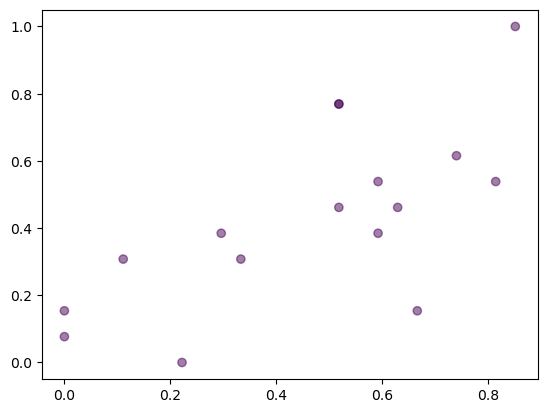

In [45]:
plt.scatter(X_train[:, feature1_index], X_train[:, feature2_index], 
            c=y_train.apply(lambda x: 0 if x == 'Iris-Versicolor' else 1), 
            cmap='viridis', marker='o', label='Train data', alpha=0.5)

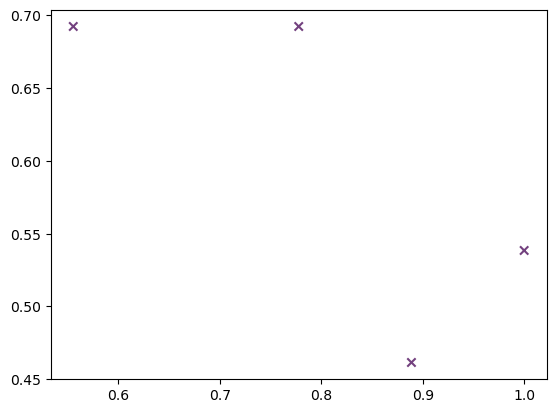

In [46]:
# Vẽ điểm cho tập kiểm tra
plt.scatter(X_test[:, feature1_index], X_test[:, feature2_index], 
            c=y_test.apply(lambda x: 0 if x == 'Iris-Versicolor' else 1), 
            cmap='viridis', marker='x', label='Test data', alpha=0.75)

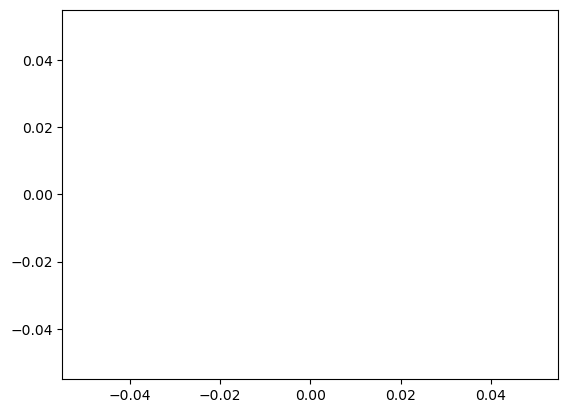

In [49]:
# Thêm legend cho từng lớp
plt.scatter([], [], c='yellow', label='Iris-Versicolor', marker='o')
plt.scatter([], [], c='purple', label='Iris-Virginica', marker='x')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


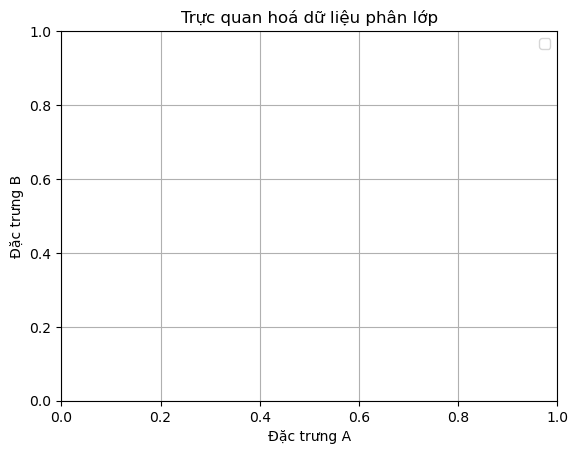

In [50]:
# Thiết lập chi tiết cho biểu đồ
plt.title('Trực quan hoá dữ liệu phân lớp')
plt.xlabel('Đặc trưng A')
plt.ylabel('Đặc trưng B')
plt.legend()
plt.grid()

In [47]:
# Hiển thị biểu đồ
plt.show()